In [5]:
import pandas as pd
import numpy as np
import random as rnd
import os
# visualization
import matplotlib.pyplot as plt
import matplotlib


# Preprocessing
from sklearn import preprocessing
import datetime

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn import model_selection as ms

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [6]:
import xgboost as clf1



In [7]:
chunks=pd.read_csv('final_training_table.csv', chunksize=1000000)
print('done')

done


In [4]:
df[-1000000:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 153645119 to 154645118
Data columns (total 30 columns):
(total 30 columns)
patientunitstayid     1000000 non-null int64
offset                1000000 non-null float64
paO2_FiO2             1000000 non-null float64
platelets_x_1000      1000000 non-null float64
total_bilirubin       1000000 non-null float64
urinary_creatinine    1000000 non-null float64
creatinine            1000000 non-null float64
HCO3                  1000000 non-null float64
pH                    1000000 non-null float64
paCO2                 1000000 non-null float64
direct_bilirubin      1000000 non-null float64
excess                1000000 non-null float64
ast                   1000000 non-null float64
bun                   1000000 non-null float64
calcium               1000000 non-null float64
glucose               1000000 non-null float64
lactate               1000000 non-null float64
magnesium             1000000 non-null float64
phosphate     

In [5]:
df.columns

Index([u'patientunitstayid', u'offset', u'paO2_FiO2', u'platelets_x_1000',
       u'total_bilirubin', u'urinary_creatinine', u'creatinine', u'HCO3',
       u'pH', u'paCO2', u'direct_bilirubin', u'excess', u'ast', u'bun',
       u'calcium', u'glucose', u'lactate', u'magnesium', u'phosphate',
       u'potassium', u'hct', u'hgb', u'ptt', u'wbc', u'fibrinogen',
       u'troponin', u'GCS_Score', u'label', u'heartrate', u'respiration'],
      dtype='object')

In [8]:
time_prior = 10
time_duration = 24
time_sep = 24

In [ ]:
dt = {}
colms = ['paO2_FiO2', 'platelets_x_1000',
       'total_bilirubin', 'urinary_creatinine', 'creatinine', 'HCO3', 'pH',
       'paCO2', 'direct_bilirubin', 'excess', 'ast', 'bun', 'calcium',
       'glucose', 'lactate', 'magnesium', 'phosphate', 'potassium', 'hct',
       'hgb', 'ptt', 'wbc', 'fibrinogen', 'troponin', 'GCS_Score', 'heartrate',
       'respiration', 'temperature']
pids = df.patientunitstayid.unique()
for pid in pids:
    for col in colms:
       # print(col, pid)
        dt[(pid, col)] = df[df['patientunitstayid']==pid][col].median()
print("dictDone")

In [ ]:

for pid in pids:
    for col in colms:
        df.loc[(df.patientunitstayid==pid) & (df[col].isnull()), col] = dt[(pid, col)]
print('complete')

In [5]:
#df[-1000000:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 153645119 to 154645118
Data columns (total 30 columns):
patientunitstayid     1000000 non-null int64
offset                1000000 non-null float64
paO2_FiO2             1000000 non-null float64
platelets_x_1000      1000000 non-null float64
total_bilirubin       1000000 non-null float64
urinary_creatinine    1000000 non-null float64
creatinine            1000000 non-null float64
HCO3                  1000000 non-null float64
pH                    1000000 non-null float64
paCO2                 1000000 non-null float64
direct_bilirubin      1000000 non-null float64
excess                1000000 non-null float64
ast                   1000000 non-null float64
bun                   1000000 non-null float64
calcium               1000000 non-null float64
glucose               1000000 non-null float64
lactate               1000000 non-null float64
magnesium             1000000 non-null float64
phosphate             1000000 non

In [6]:
#df[:1000000].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 30 columns):
patientunitstayid     1000000 non-null int64
offset                1000000 non-null float64
paO2_FiO2             1000000 non-null float64
platelets_x_1000      1000000 non-null float64
total_bilirubin       1000000 non-null float64
urinary_creatinine    1000000 non-null float64
creatinine            1000000 non-null float64
HCO3                  1000000 non-null float64
pH                    1000000 non-null float64
paCO2                 1000000 non-null float64
direct_bilirubin      1000000 non-null float64
excess                1000000 non-null float64
ast                   1000000 non-null float64
bun                   1000000 non-null float64
calcium               1000000 non-null float64
glucose               1000000 non-null float64
lactate               1000000 non-null float64
magnesium             1000000 non-null float64
phosphate             1000000 non-null float

In [ ]:
df.to_csv('table_filled')

In [9]:
def feature_fun(col, df):
    
    standard_devaition = df[col].std()
    kurtosis = df[col].kurtosis()
    skewness = df[col].skew()
    mean = df[col].mean()
    minimum = df[col].min()
    maximum = df[col].max()
    rms_diff = (sum(df[col].diff().fillna(0, inplace=False).apply(lambda x: x*x))/(len(df)+1))**0.5
    return standard_devaition, kurtosis, skewness, mean, minimum, maximum, rms_diff

In [10]:
def process(demo_df, opt):
    demo_df = demo_df[['patientunitstayid', 'offset', 'paO2_FiO2', 'platelets_x_1000',
       'total_bilirubin', 'urinary_creatinine', 'creatinine', 'HCO3', 'pH',
       'paCO2', 'direct_bilirubin', 'excess', 'ast', 'bun', 'calcium',
       'glucose', 'lactate', 'magnesium', 'phosphate', 'potassium', 'hct',
       'hgb', 'ptt', 'wbc', 'fibrinogen', 'troponin', 'GCS_Score', 'heartrate', 'respiration', 'label']]
    demo_df[['patientunitstayid', 'offset']] = demo_df[['patientunitstayid', 'offset']].astype('int32')
    demo_df[['label', 'paO2_FiO2', 'platelets_x_1000',
       'total_bilirubin', 'urinary_creatinine', 'creatinine', 'HCO3', 'pH',
       'paCO2', 'direct_bilirubin', 'excess', 'ast', 'bun', 'calcium',
       'glucose', 'lactate', 'magnesium', 'phosphate', 'potassium', 'hct',
       'hgb', 'ptt', 'wbc', 'fibrinogen', 'troponin', 'GCS_Score', 'heartrate', 'respiration']] = demo_df[['label','paO2_FiO2', 'platelets_x_1000',
       'total_bilirubin', 'urinary_creatinine', 'creatinine', 'HCO3', 'pH',
       'paCO2', 'direct_bilirubin', 'excess', 'ast', 'bun', 'calcium',
       'glucose', 'lactate', 'magnesium', 'phosphate', 'potassium', 'hct',
       'hgb', 'ptt', 'wbc', 'fibrinogen', 'troponin', 'GCS_Score', 'heartrate', 'respiration']].astype('float32')
    dt = {}
    colms = ['paO2_FiO2', 'platelets_x_1000',
       'total_bilirubin', 'urinary_creatinine', 'creatinine', 'HCO3', 'pH',
       'paCO2', 'direct_bilirubin', 'excess', 'ast', 'bun', 'calcium',
       'glucose', 'lactate', 'magnesium', 'phosphate', 'potassium', 'hct',
       'hgb', 'ptt', 'wbc', 'fibrinogen', 'troponin', 'GCS_Score', 'heartrate', 'respiration']
    col_names =  demo_df.columns
    sorted_df  = demo_df
    pids = demo_df.patientunitstayid.unique()
    
    
    colm = ['paO2_FiO2', 'platelets_x_1000',
       'total_bilirubin', 'urinary_creatinine', 'creatinine', 'HCO3', 'pH',
       'paCO2', 'direct_bilirubin', 'excess', 'ast', 'bun', 'calcium',
       'glucose', 'lactate', 'magnesium', 'phosphate', 'potassium', 'hct',
       'hgb', 'ptt', 'wbc', 'fibrinogen', 'troponin', 'GCS_Score', 'heartrate', 'respiration']
    
    dct = {}
    for col in colm:
        dct[col+'_std'] = []
        dct[col+'_kurtosis'] = []
        dct[col+'_skewness'] = []
        dct[col+'_mean'] = []
        dct[col+'_minimum'] = []
        dct[col+'_maximum'] = []
        dct[col+'_rms_diff'] = []
    dct['label'] = []
    
    for pid in pids:
        
        if sum(sorted_df[sorted_df.patientunitstayid==pid]['label'])==0:
            for col in colm:
                extracted_feature = feature_fun(col, sorted_df[sorted_df.patientunitstayid==pid])
                dct[col+'_std'].append(extracted_feature[0])
                dct[col+'_kurtosis'].append(extracted_feature[1])
                dct[col+'_skewness'].append(extracted_feature[2])
                dct[col+'_mean'].append(extracted_feature[3])
                dct[col+'_minimum'].append(extracted_feature[4])
                dct[col+'_maximum'].append(extracted_feature[5])
                dct[col+'_rms_diff'].append(extracted_feature[6])
            dct['label'].append(0)
            
       #     print("sdfdsfdsfssssss", pid)
        else:
            sepsis_onset_idx = sorted_df[sorted_df.patientunitstayid==pid][sorted_df['label']==1].index.values.astype(int)[0]
            sepsis_onset_offset = sorted_df[sorted_df.patientunitstayid==pid].loc[sepsis_onset_idx]['offset']
          #  print(sorted_df[sorted_df.patientunitstayid==pid])
            data_start = sorted_df[sorted_df.patientunitstayid==pid][sorted_df['offset']>sepsis_onset_offset-(time_duration+time_prior)*60].index.values.astype(int)[0]
            data_end = sorted_df[sorted_df.patientunitstayid==pid][sorted_df['offset']>sepsis_onset_offset-(time_prior)*60].index.values.astype(int)[0]
             #   print(sorted_df[sorted_df.patientunitstayid==pid])
           # print("Possible",data_start, data_end)
            if time_prior*60<sorted_df[sorted_df.patientunitstayid==pid].loc[sepsis_onset_idx]['offset']-sorted_df[sorted_df.patientunitstayid==pid].iloc[0]['offset']:
                print("Have data",data_start, data_end)
                if data_start<data_end:
                   # print(sorted_df.loc[data_start:data_end+1])
                    for col in colm:
                        extracted_feature = feature_fun(col, sorted_df.loc[data_start:data_end])
                        dct[col+'_std'].append(extracted_feature[0])
                        dct[col+'_kurtosis'].append(extracted_feature[1])
                        dct[col+'_skewness'].append(extracted_feature[2])
                        dct[col+'_mean'].append(extracted_feature[3])
                        dct[col+'_minimum'].append(extracted_feature[4])
                        dct[col+'_maximum'].append(extracted_feature[5])
                        dct[col+'_rms_diff'].append(extracted_feature[6])
                    dct['label'].append(1)
                    print("qweeeeeeeeeqew", pid)
    
    df = pd.DataFrame.from_dict(dct)
                    
  #  print(sum(df['label']), len(df))
    df.to_csv('Sepsis10-24'+str(opt)+'.csv')

In [ ]:
i=1
for chunk in chunks:  
    process(chunk, i)
    print(i)
    i+=1

1
2
3


In [3]:
df = pd.read_csv('Sepsis2-6'+str(1)+'.csv')
for i in range(154):
    df = pd.concat([df, pd.read_csv('Sepsis2-6'+str(i+2)+'.csv')])
df.reset_index(drop=True, inplace=True)

In [4]:
print(sum(df['label']), len(df))

(11046, 194570)


In [30]:
df.head()

Unnamed: 0  GCS_Score_kurtosis  GCS_Score_maximum  GCS_Score_mean  \
0           0            0.000000               14.0       14.000000   
1           1           10.000006               14.0       12.200000   
2           2            0.035894               15.0       12.818616   
3           3            0.819955               15.0       14.821186   
4           4            2.890419               15.0       14.869565   

   GCS_Score_minimum  GCS_Score_rms_diff  GCS_Score_skewness  GCS_Score_std  \
0               14.0            0.000000            0.000000       0.000000   
1               12.0            0.603023            3.162279       0.632456   
2                9.0            0.304725           -0.862855       1.740465   
3               14.0            0.031159           -1.678800       0.383377   
4               14.0            0.060084           -2.206700       0.337393   

   HCO3_kurtosis  HCO3_maximum      ...       urinary_creatinine_rms_diff  \
0       0.977984          24.1      ...                          4.162754   
1       0.000000          24.1      ...                          0.000000   
2       0.000000          24.1      ...                          0.000000   
3      -1.915438          24.1      ...                          0.000000   
4      -0.656846          30.0      ...                          0.000000   

   urinary_creatinine_skewness  urinary_creatinine_std  wbc_kurtosis  \
0                     1.190832               37.504471     -0.456878   
1                     0.000000                0.000000      0.000000   
2                     0.000000                0.000000     -0.562799   
3                     0.000000                0.000000     -1.637539   
4                     0.000000                0.000000     -1.989815   

   wbc_maximum   wbc_mean  wbc_minimum  wbc_rms_diff  wbc_skewness  \
0    19.799999  13.071850          9.8      0.340661      0.720030   
1     7.600000   7.599999          7.6      0.000000      0.000000   
2    10.700000  10.067064          8.1      0.126867     -1.199963   
3    14.100000   9.373969          4.3      0.249134     -0.191408   
4    26.200001  19.031532         10.7      1.181231     -0.148666   

        wbc_std  
0  3.248615e+00  
1  5.026305e-07  
2  1.117141e+00  
3  3.967762e+00  
4  7.725964e+00  

[5 rows x 191 columns]

In [10]:
df.head()

Unnamed: 0                                          GCS_Score  \
0           0                 (0.0, 0, 0, 14.0, 14.0, 14.0, 1.0)   
1           1  (0.632455587387085, 10.000006, 3.1622787, 12.1...   
2           2  (1.7404651641845703, 0.035894495, -0.86285466,...   
3           3  (0.3833766281604767, 0.81995475, -1.6787997, 1...   
4           4  (0.33739331364631653, 2.8904195, -2.2066996, 1...   

                                                HCO3  \
0  (4.259270191192627, 0.97798407, -1.6633343, 22...   
1  (2.0105219391552964e-06, 0, 0, 24.100002288818...   
2  (1.7186659533763304e-05, 0, 0, 24.099983215332...   
3  (5.492599010467529, -1.9154381, 0.29713395, 17...   
4  (2.5594160556793213, -0.65684599, 1.1610194, 2...   

                                                 ast  \
0  (1294.6766357421875, 2.6570594, 1.9919044, 863...   
1                 (0.0, 0, 0, 40.0, 40.0, 40.0, 1.0)   
2                 (0.0, 0, 0, 30.0, 30.0, 30.0, 1.0)   
3  (2.2060441970825195, 10.717278, -3.5632083, 23...   
4  (7.492311000823975, -1.9831644, 0.17512587, 21...   

                                                 bun  \
0  (2.185408353805542, -0.35623279, -0.81763995, ...   
1                 (0.0, 0, 0, 11.0, 11.0, 11.0, 1.0)   
2  (2.8832879066467285, -0.64932925, -1.0831184, ...   
3  (3.2216708660125732, 10.134559, 0.41793981, 31...   
4  (3.0179038047790527, -1.9673454, 0.15763113, 1...   

                                             calcium  \
0  (0.35377267003059387, -1.4318398, -0.24236396,...   
1                    (0.0, 0, 0, 8.0, 8.0, 8.0, 1.0)   
2  (0.36188411712646484, -1.6945339, 0.4687531, 8...   
3  (0.7824128270149231, 3.3567188, 2.0160561, 7.4...   
4  (0.34824055433273315, -1.9803532, -0.16394269,...   

                                          creatinine  \
0  (0.5918259024620056, -0.46278295, -0.50403464,...   
1  (6.282881059860301e-08, 0, 0, 0.69999992847442...   
2  (0.062492843717336655, 17.320419, 4.3860879, 0...   
3  (0.23244264721870422, 3.1456206, 1.65808, 2.23...   
4  (0.09956581145524979, -1.9814347, 0.16838185, ...   

                                    direct_bilirubin  \
0  (1.282968582927424e-06, 0, 0, 0.30000129342079...   
1  (3.1414405299301507e-08, 0, 0, 0.2999999821186...   
2  (1.2233559800733929e-06, 0, 0, 0.3000012338161...   
3  (9.690464821687783e-07, 0, 0, 0.09999903291463...   
4  (2.6870813485402323e-07, 0, 0, 0.3000002801418...   

                                              excess  \
0                    (0.0, 0, 0, 1.0, 1.0, 1.0, 1.0)   
1                    (0.0, 0, 0, 1.0, 1.0, 1.0, 1.0)   
2                    (0.0, 0, 0, 1.0, 1.0, 1.0, 1.0)   
3                    (0.0, 0, 0, 1.0, 1.0, 1.0, 1.0)   
4  (1.7351971864700317, -0.65684521, 1.1610199, 2...   

                                          fibrinogen  \
0  (46.929683685302734, 3.7573009, -2.3958557, 30...   
1              (0.0, 0, 0, 323.0, 323.0, 323.0, 1.0)   
2              (0.0, 0, 0, 323.0, 323.0, 323.0, 1.0)   
3              (0.0, 0, 0, 323.0, 323.0, 323.0, 1.0)   
4              (0.0, 0, 0, 323.0, 323.0, 323.0, 1.0)   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                                           paO2_FiO2  \
0  (46.812339782714844, 1.2835121, -1.7303256, 20...   
1              (0.0, 0, 0, 225.0, 225.0, 225.0, 1.0)   
2              (0.0, 0, 0, 225.0, 225.0, 225.0, 1.0)   
3  (19.260419845581055, -1.9154383, -0.29713336, ...   
4  (16.894189834594727, -0.65684527, 1.16102, 234...   

                                           phosphate  \
0  (1.478606939315796, 3.7573028, 2.3958564, 3.83...   
1  (2.5131524239441205e-07, 0, 0, 3.2999997138977...   
2  (6.444997325161239e-06, 0, 0, 3.30000638961792...   


In [ ]:
df[df['label']==1]

In [31]:
def cases_df(df):
    df.drop(columns=['Unnamed: 0'], inplace = True)
    df.dropna(inplace=True)
    sepsis_df = df[df['label']==1]
   # cases_pids = sepsis_df.patientunitstayid.unique()
   # df.dropna(inplace=True)
   

  #  df = df.drop(df[[volume != Sum for Sum in sum([df.patientunitstayid!=pid for pid in cases_pids])]].index)
    '''
    pids = df.patientunitstayid.unique()
    for pid in pids:
        remove_n = len(df[df['patientunitstayid'] == pid]) - int(len(df[df['patientunitstayid'] == pid])*0.01)
        drop_indices = np.random.choice(df[df['patientunitstayid'] == pid].index, remove_n, replace=False)
        df = df.drop(drop_indices)        
    '''
   # df.drop(['patientunitstayid'],axis=1, inplace = True)
 #   sepsis_df.drop(['patientunitstayid'],axis=1, inplace = True)

    return sepsis_df

In [32]:
def df_preprocess(df):
   # df.drop(columns=['Unnamed: 0'], inplace = True)
    df.dropna(inplace=True)
    sepsis_df = df[df['label']==0]

 #   df = df.drop(df[[volume != Sum for Sum in sum([df.patientunitstayid!=pid for pid in cases_pids])]].index)
    '''
    pids = df.patientunitstayid.unique()
    for pid in pids:
        remove_n = len(df[df['patientunitstayid'] == pid]) - int(len(df[df['patientunitstayid'] == pid])*0.01)
        drop_indices = np.random.choice(df[df['patientunitstayid'] == pid].index, remove_n, replace=False)
        df = df.drop(drop_indices)        
    '''
   # df.drop(['patientunitstayid'],axis=1, inplace = True)
 #   sepsis_df.drop(['patientunitstayid'],axis=1, inplace = True)

    return sepsis_df

In [33]:
sepsis_df = cases_df(df)

#df = df_preprocess(df)

#cases_pids = sepsis_df.patientunitstayid.unique()
#volume = len(cases_pids)
#sepsis_df.drop(['patientunitstayid'],axis=1, inplace = True)
labels = sepsis_df['label']
sepsis_X_train, sepsis_x_cv, sepsis_label, sepsis_y_cv = train_test_split(sepsis_df, labels, test_size=0.2, random_state=23)


In [34]:
controls_df = df_preprocess(df)

#controls_df.drop(['patientunitstayid'],axis=1, inplace = True)
labels = controls_df['label']
X_train, x_cv, label, y_cv = train_test_split(controls_df, labels, test_size=0.2, random_state=23)


In [64]:
print(len(sepsis_df), len(controls_df))

(6834, 181494)


In [8]:
def get_controls(df):
    downsampled_df, _, _, _ = train_test_split(df, df['label'], test_size=0.01)
    return downsampled_df

In [42]:
params = {'eta': 0.1, 'max_depth': 6, 'scale_pos_weight': 1, 'objective': 'reg:linear','subsample':0.25,'verbose': False}
xgb_model = None

In [50]:
params = {'eta': 0.1, 'max_depth': 15, 'scale_pos_weight': 10, 'objective': 'reg:linear','subsample':0.25,'verbose': False}
xgb_model = None
pf = pd.concat([sepsis_X_train, X_train])
labels = pf['label']
temp, X_cv, label, Y_cv = train_test_split(pf, labels, test_size=0.2)
xg_train_1 = clf1.DMatrix(temp.drop(['label'],axis=1), label=label)
xg_test = clf1.DMatrix(X_cv.drop(['label'],axis=1), label=Y_cv)
model = clf1.train(params, xg_train_1, 50, xgb_model=xgb_model)
print(classification_report(Y_cv, (model.predict(xg_test)>0.5).astype(int)))
print('F1 score:', f1_score(Y_cv, (model.predict(xg_test)>0.5).astype(int)))

[09:03:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
             precision    recall  f1-score   support

          0       0.99      0.99      0.99     29006
          1       0.74      0.78      0.76      1127

avg / total       0.98      0.98      0.98     30133

('F1 score:', 0.75736568457538989)


In [10]:
import copy

In [68]:
sepsis_X_train.head()

GCS_Score_kurtosis  GCS_Score_maximum  GCS_Score_mean  \
117554            1.284869               15.0       14.812500   
193271            0.000000               14.0       14.000000   
184680            5.999999               14.0        4.833333   
30763             0.000000               11.0       11.000000   
68782             0.000000               14.0       14.000000   

        GCS_Score_minimum  GCS_Score_rms_diff  GCS_Score_skewness  \
117554               14.0            0.242536           -1.771925   
193271               14.0            0.000000            0.000000   
184680                3.0            4.157609            2.449490   
30763                11.0            0.000000            0.000000   
68782                14.0            0.000000            0.000000   

        GCS_Score_std  HCO3_kurtosis  HCO3_maximum  HCO3_mean    ...     \
117554       0.403113       0.000000     24.100000  24.100004    ...      
193271       0.000000      -0.765031     32.299999  25.720001    ...      
184680       4.490731      -1.875000     24.100000  21.900002    ...      
30763        0.000000       4.355614     24.100000  18.748005    ...      
68782        0.000000      -0.363622     24.900000  21.833332    ...      

        urinary_creatinine_rms_diff  urinary_creatinine_skewness  \
117554                          0.0                          0.0   
193271                          0.0                          0.0   
184680                          0.0                          0.0   
30763                           0.0                          0.0   
68782                           0.0                          0.0   

        urinary_creatinine_std  wbc_kurtosis  wbc_maximum   wbc_mean  \
117554                     0.0      1.284877    16.200001  16.106249   
193271                     0.0      4.999991    13.300000  12.780000   
184680                     0.0      0.000000    14.000000  14.000000   
30763                      0.0      9.640832    16.299999  15.851997   
68782                      0.0      8.999998    19.600000   8.755556   

        wbc_minimum  wbc_rms_diff  wbc_skewness   wbc_std  
117554         15.7      0.121268     -1.771928  0.201557  
193271         10.7      1.061446     -2.236066  1.162756  
184680         14.0      0.000000      0.000000  0.000000  
30763          10.7      1.098250     -3.297526  1.550570  
68782           7.4      3.857979      3.000000  4.066667  

[5 rows x 190 columns]

In [25]:

runs = 80
Temp_X_cv = copy.copy(sepsis_x_cv)
Temp_y_cv = copy.copy(sepsis_y_cv)
for i in range(runs):
    
    pf = pd.concat([sepsis_X_train, get_controls(X_train).reset_index(drop=True)])
    labels = pf['label']
  #  train_df = pf.drop(['temperature'],axis=1)
   
    print("count: ", i+1)
    print(sum(labels), len(labels))
    if True:
      #  xgb_model = 'model.model'
        temp, X_cv, label, Y_cv = train_test_split(pf, labels, test_size=0.05)
        xg_train_1 = clf1.DMatrix(temp.drop(['label'],axis=1), label=label)
        xg_test = clf1.DMatrix(X_cv.drop(['label'],axis=1), label=Y_cv)
        model = clf1.train(params, xg_train_1, 50, xgb_model=xgb_model)
        model.save_model('model.model')
        xgb_model = 'model.model'
    
    
   # print(clf1.score(X_cv.drop(['temperature'],axis=1), y_cv))
        print(classification_report(Y_cv, (model.predict(xg_test)>0.5).astype(int)))
        print('F1 score:', f1_score(Y_cv, (model.predict(xg_test)>0.5).astype(int)))
    
        Temp_X_cv = pd.concat([Temp_X_cv, X_cv])
        Temp_y_cv = pd.concat([Temp_y_cv, Y_cv])

    
#print(clf1.score(Temp_X_cv.drop(['temperature'],axis=1), Temp_y_cv))

print("1st cv score")
print(classification_report(Temp_y_cv, (model.predict(clf1.DMatrix(Temp_X_cv.drop(['label'],axis=1), label=Temp_y_cv))>0.5).astype(int)))
print('F1 score:', f1_score(Temp_y_cv, (model.predict(clf1.DMatrix(Temp_X_cv.drop(['label'],axis=1), label=Temp_y_cv))>0.5).astype(int)))

print("2nd cv score")

CV_X = pd.concat([sepsis_x_cv, x_cv])
cv_y = pd.concat([sepsis_y_cv, y_cv])
print(classification_report(cv_y, (model.predict(clf1.DMatrix(CV_X.drop(['label'],axis=1), label=cv_y))>0.5).astype(int)))
print('F1 score:', f1_score(cv_y, (model.predict(clf1.DMatrix(CV_X.drop(['label'],axis=1), label=cv_y))>0.5).astype(int)))


('count: ', 1)
(5467, 149210)
[07:58:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      7204
          1       0.85      0.65      0.74       257

avg / total       0.98      0.98      0.98      7461

('F1 score:', 0.73568281938325986)
('count: ', 2)
(5467, 149210)
[07:58:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      7178
          1       0.93      0.73      0.82       283

avg / total       0.99      0.99      0.99      7461

('F1 score:', 0.81746031746031744)
('count: ', 3)
(5467, 149210)
[07:58:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
             precision    rec

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      7180
          1       1.00      0.95      0.97       281

avg / total       1.00      1.00      1.00      7461

('F1 score:', 0.97080291970802901)
('count: ', 22)
(5467, 149210)
[08:01:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      7203
          1       1.00      0.94      0.97       258

avg / total       1.00      1.00      1.00      7461

('F1 score:', 0.97005988023952106)
('count: ', 23)
(5467, 149210)
[08:01:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      7165
          1       1.00      0.96      0.98       296

avg / total       1.00 

('count: ', 42)
(5467, 149210)
[08:05:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      7187
          1       1.00      0.99      1.00       274

avg / total       1.00      1.00      1.00      7461

('F1 score:', 0.99633699633699624)
('count: ', 43)
(5467, 149210)
[08:05:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      7186
          1       1.00      0.99      0.99       275

avg / total       1.00      1.00      1.00      7461

('F1 score:', 0.9926739926739927)
('count: ', 44)
(5467, 149210)
[08:05:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
             precision    r

('count: ', 63)
(5467, 149210)
[08:09:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      7185
          1       1.00      0.99      1.00       276

avg / total       1.00      1.00      1.00      7461

('F1 score:', 0.99636363636363634)
('count: ', 64)
(5467, 149210)
[08:09:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      7198
          1       1.00      1.00      1.00       263

avg / total       1.00      1.00      1.00      7461

('F1 score:', 0.99809523809523815)
('count: ', 65)
(5467, 149210)
[08:10:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
             precision    

In [14]:
CV_X = pd.concat([sepsis_x_cv, x_cv])
cv_y = pd.concat([sepsis_y_cv, y_cv])
print(classification_report(cv_y, (model.predict(clf1.DMatrix(CV_X.drop(['label'],axis=1), label=cv_y))>0.5).astype(int)))
print('F1 score:', f1_score(cv_y, (model.predict(clf1.DMatrix(CV_X.drop(['label'],axis=1), label=cv_y))>0.5).astype(int)))


             precision    recall  f1-score   support

          0       0.99      0.99      0.99     36299
          1       0.83      0.73      0.78      1367

avg / total       0.98      0.99      0.98     37666

('F1 score:', 0.78067783404752633)


In [20]:
print(list(sepsis_x_cv.columns))

['GCS_Score_kurtosis', 'GCS_Score_maximum', 'GCS_Score_mean', 'GCS_Score_minimum', 'GCS_Score_rms_diff', 'GCS_Score_skewness', 'GCS_Score_std', 'HCO3_kurtosis', 'HCO3_maximum', 'HCO3_mean', 'HCO3_minimum', 'HCO3_rms_diff', 'HCO3_skewness', 'HCO3_std', 'ast_kurtosis', 'ast_maximum', 'ast_mean', 'ast_minimum', 'ast_rms_diff', 'ast_skewness', 'ast_std', 'bun_kurtosis', 'bun_maximum', 'bun_mean', 'bun_minimum', 'bun_rms_diff', 'bun_skewness', 'bun_std', 'calcium_kurtosis', 'calcium_maximum', 'calcium_mean', 'calcium_minimum', 'calcium_rms_diff', 'calcium_skewness', 'calcium_std', 'creatinine_kurtosis', 'creatinine_maximum', 'creatinine_mean', 'creatinine_minimum', 'creatinine_rms_diff', 'creatinine_skewness', 'creatinine_std', 'direct_bilirubin_kurtosis', 'direct_bilirubin_maximum', 'direct_bilirubin_mean', 'direct_bilirubin_minimum', 'direct_bilirubin_rms_diff', 'direct_bilirubin_skewness', 'direct_bilirubin_std', 'excess_kurtosis', 'excess_maximum', 'excess_mean', 'excess_minimum', 'exce

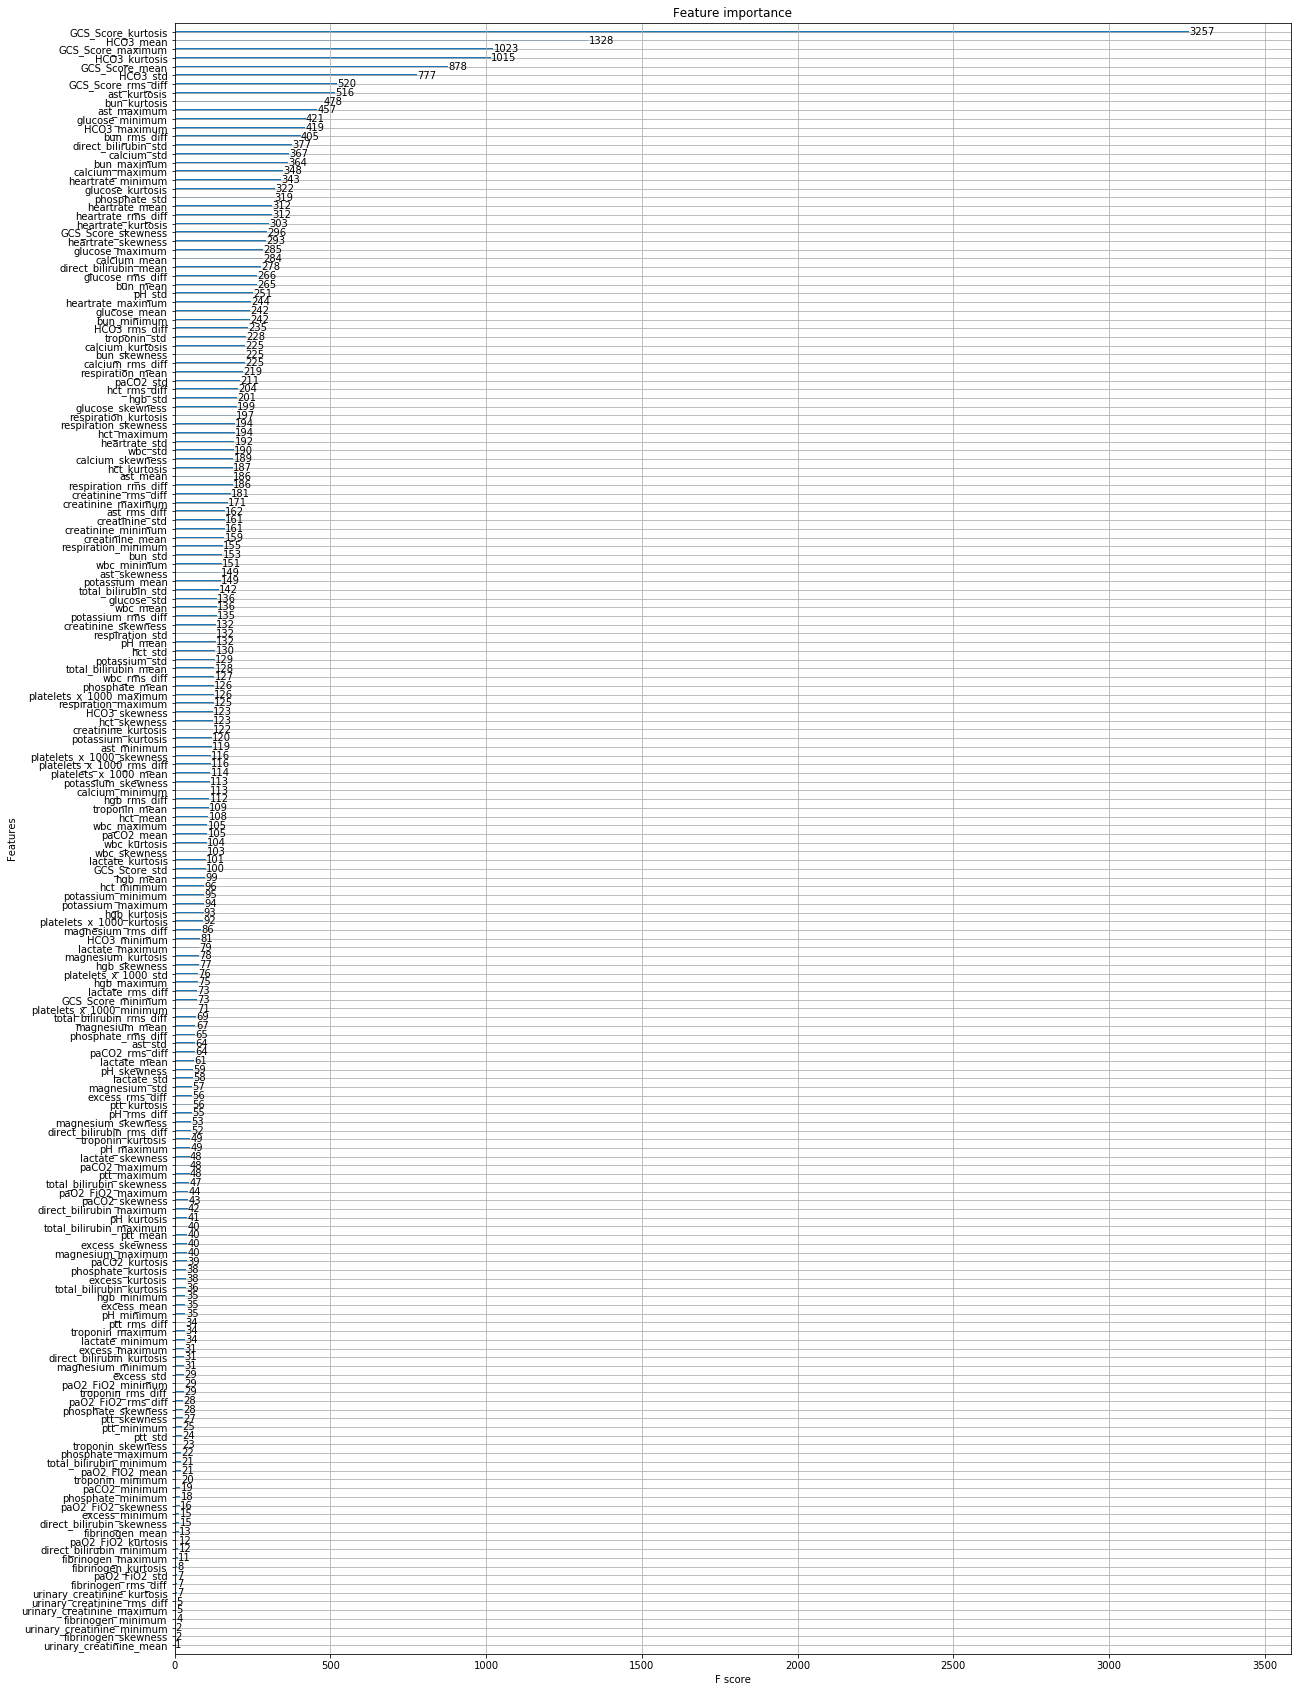

In [51]:

from matplotlib import pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(20,30))
clf1.plot_importance(model, ax=ax)

In [ ]:
 clf1.to_graphviz(model, num_trees=0, rankdir='LR')